In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [316]:
dog = pd.read_csv('./data/정리/강아지(221028).csv')

In [357]:
dog['나이_주환산'].value_counts()

27.000000     1090
104.000000     588
156.000000     506
52.000000      504
208.000000     213
260.000000     201
9.000000       157
13.500000      157
4.500000        88
18.000000       76
312.000000      75
364.000000      69
520.000000      50
416.000000      45
7.142857        33
22.500000       25
4.285714        22
2.142857        20
8.571429        19
4.000000        19
0.428571        18
5.714286        18
468.000000      17
45.000000       16
10.000000       14
36.000000       13
6.000000        12
1.000000        12
0.142857        11
7.857143        10
2.000000         9
3.000000         9
31.500000        8
2.285714         8
6.750000         6
0.714286         5
6.428571         5
4.714286         5
624.000000       5
1.428571         4
676.000000       4
49.500000        2
3.571429         2
780.000000       2
14.285714        2
5.000000         2
11.428571        1
0.571429         1
0.285714         1
572.000000       1
40.500000        1
728.000000       1
3.285714    

In [518]:
feature = dog[['체중_숫자', '나이_주환산', '친화성_score', 'api_건강점수', '털빠짐_score', '집지키기_score', '운동량', '단독주택', '단독주택/전원주택', '아파트/단독주택/전원주택', '어린이', '어린이/젊은층/노년층', '젊은층', '젊은층/노년층', 'F', 'M', 'Q', 'N', 'U', 'Y']]

In [394]:
feature = dog[['체중_숫자', '나이_주환산', '친화성_score', 'api_건강점수']]

In [442]:
feature = dog[['체중_숫자', '나이_주환산','운동량','단독주택', '단독주택/전원주택', '아파트/단독주택/전원주택', '어린이', '어린이/젊은층/노년층', '젊은층', '젊은층/노년층']]

In [445]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   level_0        4183 non-null   int64  
 1   index          4183 non-null   int64  
 2   유기번호           4183 non-null   int64  
 3   썸네일            4183 non-null   object 
 4   접수일            4183 non-null   int64  
 5   발견장소           4183 non-null   object 
 6   품종_x           4183 non-null   object 
 7   색상_x           4183 non-null   object 
 8   나이             4183 non-null   object 
 9   체중_x           4183 non-null   object 
 10  공고번호           4183 non-null   object 
 11  공고시작일          4183 non-null   int64  
 12  공고종료일          4183 non-null   int64  
 13  이미지            4183 non-null   object 
 14  성별             4183 non-null   object 
 15  중성화여부          4183 non-null   object 
 16  특징             4183 non-null   object 
 17  보호소이름          4183 non-null   object 
 18  보호소전화번호 

## 1) KMeans

In [476]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, random_state=0).fit(feature)

In [477]:
feature['cluster'] = kmeans.labels_

C:\Users\User\AppData\Local\Temp\ipykernel_13612\1684806496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['cluster'] = kmeans.labels_


In [478]:
def visualize_km_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    # cluster_lists에 군집의 갯수들이 저장되어 있음
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels) # 전체 데이터의 실루엣 계수의 평균
        sil_values = silhouette_samples(X_features, cluster_labels) # 개별 데이터의 실루엣 계쑤
        
        # 그래프 그리는 코드
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

### 스케일 적용 전  -- 나이, 체중 스케일이 다른 피처에 비해 월등히 큼

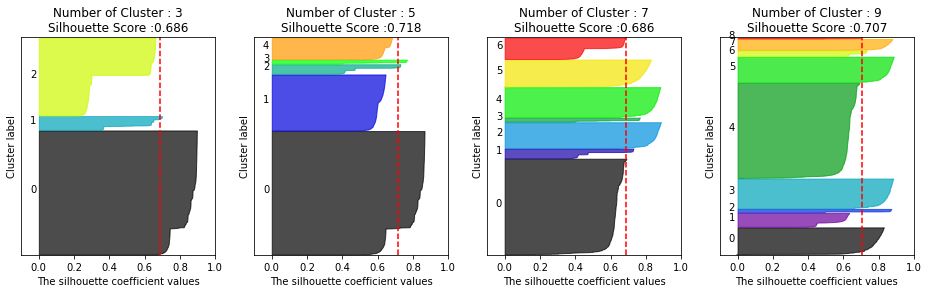

In [479]:
visualize_km_silhouette([3,5,7,9], feature)

### Standand 스케일

In [480]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   
dog_std_scaled = scaler.fit_transform(feature)


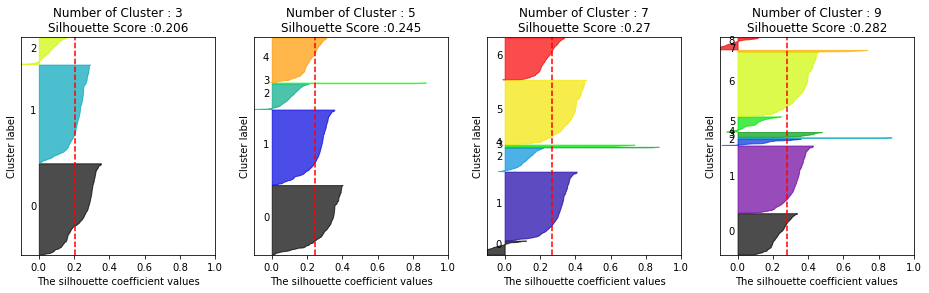

In [481]:
visualize_km_silhouette([3,5,7,9], dog_std_scaled)

### Robust 스케일

In [482]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
dog_robust_scaled = robust_scaler.fit_transform(feature)

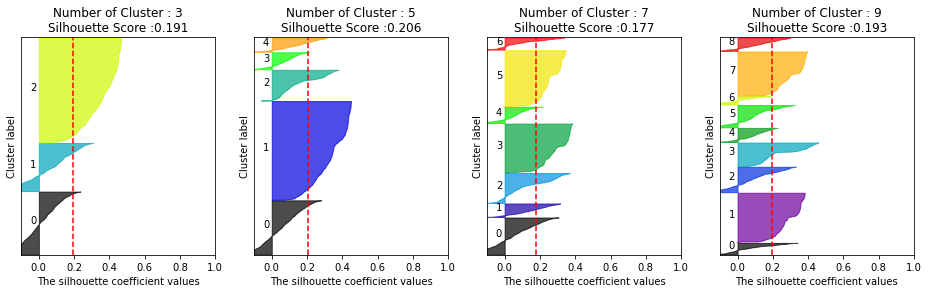

In [483]:
visualize_km_silhouette([3,5,7,9], dog_robust_scaled)

### minmax 스케일

In [521]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(feature)
dog_minmax_scaled = scaler.transform(feature)

In [522]:
# dog_minmax_scaled[:,0] = dog_minmax_scaled[:,0] * 10
# dog_minmax_scaled[:,1] = dog_minmax_scaled[:,1] * 10
# dog_minmax_scaled[:,2] = dog_minmax_scaled[:,2] * 3
# dog_minmax_scaled[:,3] = dog_minmax_scaled[:,3] * 3
# dog_minmax_scaled[:,4] = dog_minmax_scaled[:,4] * 3
# dog_minmax_scaled[:,5] = dog_minmax_scaled[:,5] * 3
# dog_minmax_scaled[:,6] = dog_minmax_scaled[:,6] * 3

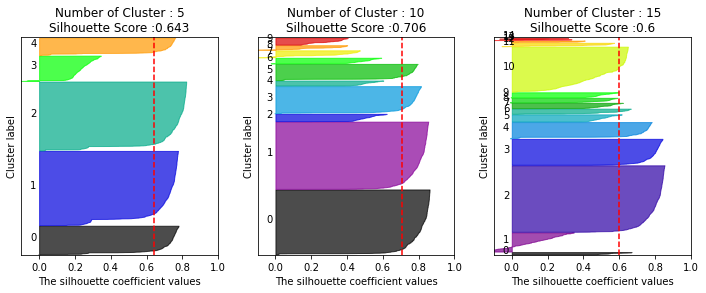

In [523]:
visualize_km_silhouette([5,10,15], dog_minmax_scaled)

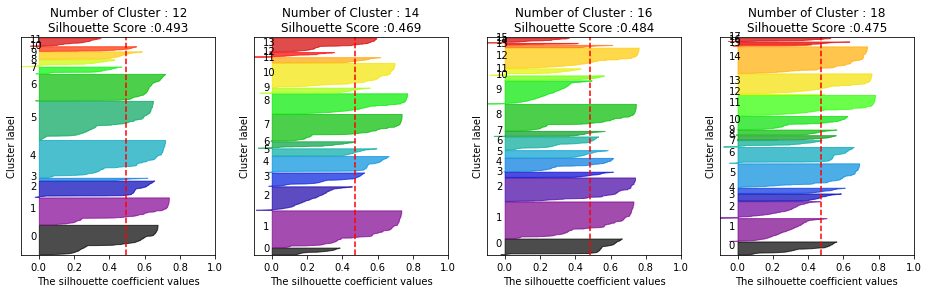

In [502]:
visualize_km_silhouette([12,14,16,18], dog_minmax_scaled)

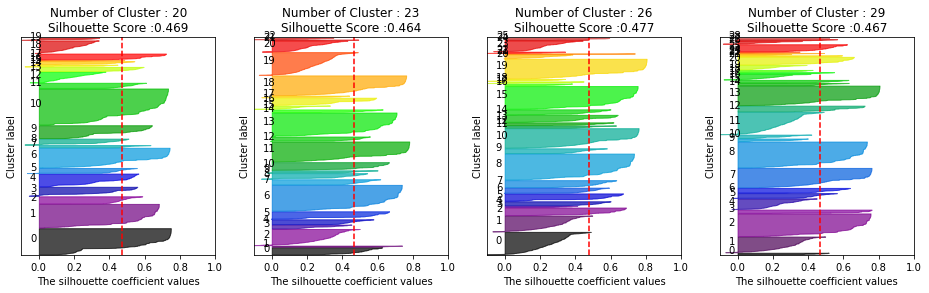

In [503]:
visualize_km_silhouette([20,23,26,29], dog_minmax_scaled)

## 2) 가우시안

In [506]:
def visualize_gs_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    # cluster_lists에 군집의 갯수들이 저장되어 있음
    for ind, n_cluster in enumerate(cluster_lists):
        
        # 가우시안 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        
        clusterer = GaussianMixture(n_components=n_cluster, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels) # 전체 데이터의 실루엣 계수의 평균
        sil_values = silhouette_samples(X_features, cluster_labels) # 개별 데이터의 실루엣 계쑤
        
        # 그래프 그리는 코드
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [490]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=0)
gmm_label = gmm.fit(dog_minmax_scaled).predict(dog_minmax_scaled)

In [491]:
average_score = silhouette_score(dog_minmax_scaled, gmm_label)
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

Silhouette Analysis Score:0.510


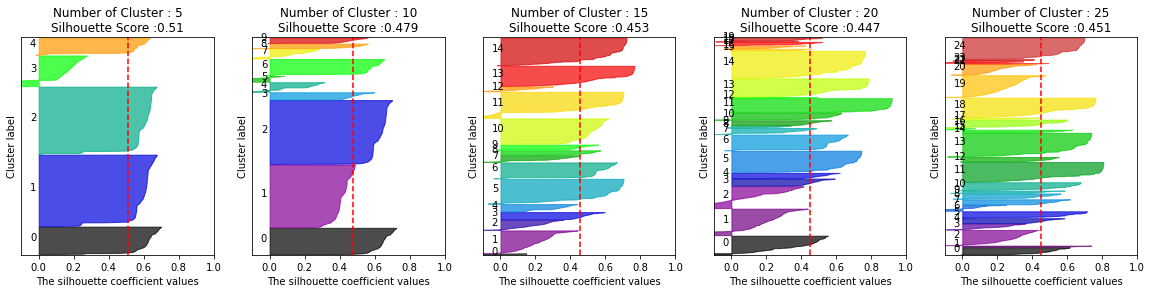

In [507]:
visualize_gs_silhouette([5,10,15,20,25], dog_minmax_scaled)

## 3) DBSCAN

In [493]:
def visualize_ds_silhouette(eps_list, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(eps_list)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    # cluster_lists에 군집의 갯수들이 저장되어 있음
    for eps in enumerate(eps_list):
        
        # dbscan 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        
        dbscan = DBSCAN(eps=eps, min_samples=10)
        cluster_labels = dbscan.fit_predict(dog_minmax_scaled)
        n_cluster = len(set(dbscan_labels))
        sil_avg = silhouette_score(X_features, cluster_labels) # 전체 데이터의 실루엣 계수의 평균
        sil_values = silhouette_samples(X_features, cluster_labels) # 개별 데이터의 실루엣 계쑤
        
        # 그래프 그리는 코드
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [494]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=10)
dbscan_labels = dbscan.fit_predict(dog_minmax_scaled)

In [516]:
eps_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.5, 1.6]

In [517]:
for eps in eps_list :
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan_labels = dbscan.fit_predict(dog_minmax_scaled)
    average_score = silhouette_score(dog_minmax_scaled, dbscan_labels)
    print('eps : ',eps, '/ 군집개수:',len(set(dbscan_labels)))
    print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

eps :  0.2 / 군집개수: 26
Silhouette Analysis Score:0.265
eps :  0.4 / 군집개수: 22
Silhouette Analysis Score:0.494
eps :  0.6 / 군집개수: 16
Silhouette Analysis Score:0.571
eps :  0.8 / 군집개수: 16
Silhouette Analysis Score:0.593
eps :  1.0 / 군집개수: 16
Silhouette Analysis Score:0.594
eps :  1.2 / 군집개수: 17
Silhouette Analysis Score:0.596
eps :  1.4 / 군집개수: 17
Silhouette Analysis Score:0.596
eps :  1.5 / 군집개수: 3
Silhouette Analysis Score:0.319
eps :  1.6 / 군집개수: 3
Silhouette Analysis Score:0.357


## 모델링 결과 정리(minmax적용)
- KMeans  
    - 클러스터링 갯수 5 : 0.642  / 클러스터링 갯수 7 : 0.605  /  클러스터링 갯수 9 : 0.602
- 가우시안
    - 클러스터링 갯수 5 : 0.593  /  클러스터링 갯수 7 : 0.535  /  클러스터링 갯수 9 : 0.5
- DBscan
    - 클러스터링 개수 6 : 0.513  /  클러스터링 갯수 7 : 0.679   /  클러스터링 갯수 9 : 0.625

In [497]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(dog_minmax_scaled)
set(dbscan_labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [498]:
len(set(dbscan_labels))

20

In [499]:
# visualize_ds_silhouette([[0.3,0.5,0.7,0.9, 1.1, 1.3, 1.5]], dog_minmax_scaled)

## 유사도 

### 코사인 유사도

In [500]:
from scipy.spatial.distance import cosine

from sklearn.metrics.pairwise import cosine_similarity

dog_cos_sim = cosine_similarity(dog_minmax_scaled, dog_minmax_scaled)

dog_cos_sim

# dog_sim_rank = dog_cos_sim.argsort(axis=1)[0]

# np.where(dog_sim_rank==0)

# np.flip(dog_sim, axis=0)

array([[1.        , 0.31311007, 0.485354  , ..., 0.2799788 , 0.2799788 ,
        0.2799788 ],
       [0.31311007, 1.        , 0.82487906, ..., 0.81858522, 0.81858522,
        0.81858522],
       [0.485354  , 0.82487906, 1.        , ..., 0.62888712, 0.62888712,
        0.62888712],
       ...,
       [0.2799788 , 0.81858522, 0.62888712, ..., 1.        , 1.        ,
        1.        ],
       [0.2799788 , 0.81858522, 0.62888712, ..., 1.        , 1.        ,
        1.        ],
       [0.2799788 , 0.81858522, 0.62888712, ..., 1.        , 1.        ,
        1.        ]])

### 피어슨 유사도

In [501]:
from scipy.stats import pearsonr
import numpy as np

# def pearson_similarity(a, b):
#     return np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))

# pearson_similarity(dog_scaled_[0], dog_scaled_[2])

np.corrcoef(dog_minmax_scaled,dog_minmax_scaled)

array([[ 1.        , -0.19842851,  0.07909041, ..., -0.20334992,
        -0.20334992, -0.20334992],
       [-0.19842851,  1.        ,  0.68177058, ...,  0.69396982,
         0.69396982,  0.69396982],
       [ 0.07909041,  0.68177058,  1.        , ...,  0.35773063,
         0.35773063,  0.35773063],
       ...,
       [-0.20334992,  0.69396982,  0.35773063, ...,  1.        ,
         1.        ,  1.        ],
       [-0.20334992,  0.69396982,  0.35773063, ...,  1.        ,
         1.        ,  1.        ],
       [-0.20334992,  0.69396982,  0.35773063, ...,  1.        ,
         1.        ,  1.        ]])